## Final Project 

In this notebook, we build a ML model to predict the __Time at Center__ (0 = less than 30 days; 1 = more than 30 days) field of our final project dataset.

1. <a href="#1">Read the dataset</a> (Given) 
2. <a href="#2">Train a model</a> (Implement)
    * <a href="#21">Exploratory Data Analysis</a>
    * <a href="#22">Select features to build the model</a>
    * <a href="#23">Data processing</a>
    * <a href="#24">Model training</a>
3. <a href="#3">Make predictions on the test dataset</a> (Implement)
4. <a href="#4">Evaluate accuracy</a> (Given)

__Austin Animal Center Dataset__:

In this exercise, we are working with pet adoption data from __Austin Animal Center__. We have two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). 

In order to work with a single table, we joined the intake and outcome tables using the "Animal ID" column and created a training.csv, test_features.csv and y_test.csv files. Similar to  Austin_Animal_dataset.csv, we didn't consider animals with multiple entries to the facility to keep it simple (each ID is unique). If you want to see the original datasets, they are available under `DATA/final_project` folder.

__Dataset schema:__ 
- __Pet ID__ - Unique ID of pet
- __Outcome Type__ - State of pet at the time of recording the outcome
- __Sex upon Outcome__ - Sex of pet at outcome
- __Name__ - Name of pet 
- __Found Location__ - Found location of pet before entered the center
- __Intake Type__ - Circumstances bringing the pet to the center
- __Intake Condition__ - Health condition of pet when entered the center
- __Pet Type__ - Type of pet
- __Sex upon Intake__ - Sex of pet when entered the center
- __Breed__ - Breed of pet 
- __Color__ - Color of pet 
- __Age upon Intake Days__ - Age of pet when entered the center (days)
- __Time at Center__ - Time at center (0 = less than 30 days; 1 = more than 30 days). This is the value to predict. 


In [1]:
# # Upgrade dependencies
# !pip install --upgrade pip
# !pip install --upgrade scikit-learn

## 1. <a name="1">Read the datasets</a> (Given)
(<a href="#0">Go to top</a>)

Let's read the datasets into dataframes, using Pandas.

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
  
training_data = pd.read_csv('../../DATA/final_project/training.csv')
test_data = pd.read_csv('../../DATA/final_project/test_features.csv')

print('The shape of the training dataset is:', training_data.shape)
print('The shape of the test dataset is:', test_data.shape)


The shape of the training dataset is: (71538, 13)
The shape of the test dataset is: (23846, 12)


## 2. <a name="2">Train a model</a> (Implement)
(<a href="#0">Go to top</a>)

 * <a href="#21">Exploratory Data Analysis</a>
 * <a href="#22">Select features to build the model</a>
 * <a href="#23">Data processing</a>
 * <a href="#24">Model training</a>

### 2.1 Exploratory Data Analysis
(<a href="#2">Go to Train a model</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [3]:
# Implement here
training_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Time at Center
0,A745079,Transfer,Unknown,NaN,7920 Old Lockhart in Travis (TX),Stray,Normal,Cat,Unknown,Domestic Shorthair Mix,Blue,3,0
1,A801765,Transfer,Intact Female,NaN,5006 Table Top in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair,Brown Tabby/White,28,0
2,A667965,Transfer,Neutered Male,NaN,14100 Thermal Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Chihuahua Shorthair Mix,Brown/Tan,1825,0
3,A687551,Transfer,Intact Male,NaN,5811 Cedardale Dr in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,28,0
4,A773004,Adoption,Neutered Male,*Boris,Highway 290 And Arterial A in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Tricolor/Cream,365,0


In [4]:
training_data = training_data.drop(['Pet ID'], axis = 1)

In [5]:
# Implement here
test_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days
0,A782657,Adoption,Spayed Female,NaN,1911 Dear Run Drive in Austin (TX),Stray,Normal,Dog,Intact Female,Labrador Retriever Mix,Black,60
1,A804622,Adoption,Neutered Male,NaN,702 Grand Canyon in Austin (TX),Stray,Normal,Dog,Intact Male,Boxer/Anatol Shepherd,Brown/Tricolor,60
2,A786693,Return to Owner,Neutered Male,Zeus,Austin (TX),Public Assist,Normal,Dog,Neutered Male,Australian Cattle Dog/Pit Bull,Black/White,3285
3,A693330,Adoption,Spayed Female,Hope,Levander Loop & Airport Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,Miniature Poodle,Gray,1825
4,A812431,Adoption,Neutered Male,NaN,Austin (TX),Owner Surrender,Injured,Cat,Intact Male,Domestic Shorthair,Blue/White,210


In [6]:
test_data = test_data.drop(['Pet ID'], axis = 1)

### 2.2 <a name="22">Select features to build the model</a> 
(<a href="#2">Go to Train a model</a>)


In [7]:
# Implement here
# Split model target and features
model_target = 'Time at Center' # 0 & 1
model_features = training_data.columns.drop(model_target).tolist()

# Split model features between categorical and numerical features
categorical_features = training_data.select_dtypes(include='object').columns.tolist()
numerical_features = training_data.select_dtypes(include=np.number).columns.drop(model_target).tolist()

In [8]:
for c in categorical_features:
    print('%s has %s unqique instances.' % (c, str(len(np.unique(training_data[c].tolist())))))
    print('\n')

Outcome Type has 10 unqique instances.


Sex upon Outcome has 6 unqique instances.


Name has 14580 unqique instances.


Found Location has 35425 unqique instances.


Intake Type has 6 unqique instances.


Intake Condition has 10 unqique instances.


Pet Type has 5 unqique instances.


Sex upon Intake has 6 unqique instances.


Breed has 2126 unqique instances.


Color has 525 unqique instances.




In [9]:
# Remove features that have too many unique instances
categorical_features.remove('Found Location')
categorical_features.remove('Name')

### 2.3 <a name="23">Data Processing</a> 
(<a href="#2">Go to Train a model</a>)


Set up the data processing - use different pipelines per data type.

In [10]:
# Implement here
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', StandardScaler()) 
                                ])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
                                ])

# Combine all data preprocessors from above (add more, if you choose to define more!)
# For each processor/step specify: a name, the actual process, and finally the features to be processed
numerical_data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features)]) 

categorical_data_preprocessor = ColumnTransformer([
    ('categorical_pre', categorical_processor, categorical_features)]) 

data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('categorical_pre', categorical_processor, categorical_features)]) 


Split the dataset into train and validation (test data is provided at beginning of the notebook so we don't need to split again).

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into two parts: 80%-10% split
X_train, X_val, y_train, y_val = train_test_split(training_data[model_features], training_data[model_target], test_size = 0.10)

X_train = data_preprocessor.fit_transform(X_train)
X_val = data_preprocessor.transform(X_val)

In [12]:
# Neural Nets require arrays (they can't handle dataframes) - need to convert
X_train = X_train.toarray()
X_val = X_val.toarray()

In [13]:
import torch
from torch import nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Use PyTorch DataLoaders to load the data in batches
batch_size = 10           # How many samples to use for each weight update 

# Convert to TensorDataset
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                               torch.tensor(y_train.values, dtype=torch.float32))

# Initialize DataLoader (this will pull example data in batches from training dataset)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, drop_last=True) # drop_last drops any incomplete batches during training

# Move validation dataset to CPU/GPU device
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val.values, dtype=torch.float32).to(device)

### 2.4 <a name="24">Model training</a> 
(<a href="#2">Go to Train a model</a>)


In [14]:
# Implement here
# Look at shape to (1) Make sure training and validation set have same shape and (2) To get in_features size for NN
X_train.shape, X_val.shape

((64384, 2565), torch.Size([7154, 2565]))

In [15]:
# Use GPU resource if available, otherwise wil use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = nn.Sequential(nn.Linear(in_features=X_train.shape[1], out_features=10),
                    nn.ReLU(),
                    nn.Linear(10, 10),
                    nn.ReLU(),
                    nn.Linear(10, 1),
                    nn.Sigmoid())

In [16]:
def xavier_init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)

net.apply(xavier_init_weights)
net.to(device)

Sequential(
  (0): Linear(in_features=2565, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)

In [17]:
from torch.nn import BCELoss

epochs = 30   # Total number of iterations
lr = 0.05     # Learning rate

# Define the loss. As we used sigmoid in the last layer, we use `nn.BCELoss`.
# Otherwise we could have made use of `nn.BCEWithLogitsLoss`.
loss = BCELoss(reduction='none')

# Define the optimizer, SGD with learning rate
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [18]:
train_losses = []
val_losses = []

for epoch in range(epochs):
    training_loss = 0
    # Build a training loop, to train the network
    for idx, (data, target) in enumerate(train_loader):
        # zero the parameter gradients
        optimizer.zero_grad()
        
        data = data.to(device)
        target = target.to(device).view(-1, 1)
        
        output = net(data)
        L = loss(output, target).sum()
        training_loss += L.item()
        L.backward()
        optimizer.step()
    
    # Get validation predictions
    val_predictions = net(X_val)
    # Calculate the validation loss
    val_loss = torch.sum(loss(val_predictions, y_val.view(-1, 1))).item()
    
    # Take the average losses
    training_loss = training_loss / len(y_train)
    val_loss = val_loss / len(y_val)
    
    train_losses.append(training_loss)
    val_losses.append(val_loss)

    # Print the losses every 10 epochs
    if (epoch == 0) or ((epoch+1)%10 == 0):
        print("Epoch %s. Train_loss %f Validation_loss %f" % \
              (epoch, training_loss, val_loss))

Epoch 0. Train_loss 0.223473 Validation_loss 0.225450
Epoch 9. Train_loss 0.203093 Validation_loss 0.222642
Epoch 19. Train_loss 0.196174 Validation_loss 0.218361
Epoch 29. Train_loss 0.193191 Validation_loss 0.216605


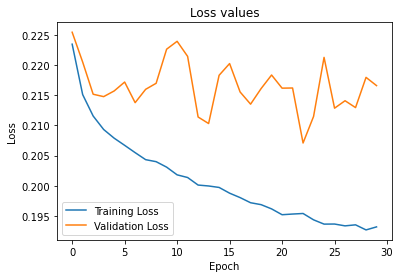

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Neither training not validation loss improve significantly after the 10th iteration. This could suggest that new features should be generated. For example, maybe the address can be grouped into neighborhoods and then OneHot encoded.

## 3. <a name="3">Make predictions on the test dataset</a> (Implement)
(<a href="#0">Go to top</a>)

Use the test set to make predictions with the trained model.

In [20]:
# Implement here
X_test = data_preprocessor.transform(test_data)
X_test = X_test.toarray()

In [21]:
y_pred = net(torch.tensor(X_test, dtype=torch.float32).to(device))

In [22]:
# Round predictions: 1 if pred>0.5, 0 otherwise
y_pred = np.round(y_pred.cpu().detach().numpy())

## 4. <a name="4">Evaluate accuracy</a> (Implement)
(<a href="#0">Go to top</a>)

Use the Sklearn in-built reports to evaluate model accuracy.

In [23]:
# Implement here
from sklearn.metrics import classification_report, confusion_matrix

# Read in test labels
y_test = pd.read_csv('../../DATA/final_project/y_test.csv', header = None)

# Get validation predictions
print("Classification Report")
print(classification_report(y_test.values, y_pred))

print(confusion_matrix(y_test.values, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21733
           1       0.56      0.54      0.55      2113

    accuracy                           0.92     23846
   macro avg       0.76      0.75      0.75     23846
weighted avg       0.92      0.92      0.92     23846

[[20831   902]
 [  965  1148]]


The NN is paying more attention to the dominant class (class 0). We see a low recall score for class 1 and an imbalanced confusion matrix. To fix this, upsampling of the minority class could be a next step.